In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("/content/drive/MyDrive/71 Centuries of Virat Kohli.csv")
df.head(3)

,Score,Out/Not Out,Against,Batting Order,Inn.,Strike Rate,Venue,Column1,H/A,Date,Result,Format,Man of the Match,Captain,Unnamed: 14
0,116,Out,Australia,6,2,NaN,Adelaide Oval,Adelaide,Away,24-01-2012,Lost,Test,No,No,NaN
1,103,Out,New Zealand,5,2,NaN,M. Chinnaswamy Stadium,Bangalore,Home,31-08-2012,Won,Test,Yes,No,NaN
2,103,Out,England,5,2,NaN,Vidarbha Cricket Association Stadium,Nagpur,Home,13-12-2012,Drawn,Test,No,No,NaN


In [3]:
df=df.iloc[:,:-1]

In [4]:
df.shape

(71, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Score             71 non-null     int64  
 1   Out/Not Out       71 non-null     object 
 2   Against           71 non-null     object 
 3   Batting Order     71 non-null     int64  
 4   Inn.              71 non-null     int64  
 5   Strike Rate       44 non-null     float64
 6   Venue             71 non-null     object 
 7   Column1           71 non-null     object 
 8   H/A               71 non-null     object 
 9   Date              71 non-null     object 
 10  Result            71 non-null     object 
 11  Format            71 non-null     object 
 12  Man of the Match  71 non-null     object 
 13  Captain           71 non-null     object 
dtypes: float64(1), int64(3), object(10)
memory usage: 7.9+ KB


In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by = 'Date')

df['Year'] = df['Date'].dt.year

<ipython-input-6-239c2e07e310>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


In [10]:
df.describe()

,Score,Batting Order,Inn.,Strike Rate,Year
count,71.000000,71.000000,71.000000,44.000000,71.000000
mean,132.140845,3.521127,1.732394,114.019545,2015.225352
std,35.911119,0.714326,0.675230,25.257567,2.894316
min,100.000000,1.000000,1.000000,84.900000,2009.000000
25%,107.000000,3.000000,1.000000,96.632500,2013.000000
50%,119.000000,3.000000,2.000000,108.935000,2016.000000
75%,139.500000,4.000000,2.000000,120.787500,2018.000000
max,254.000000,6.000000,4.000000,200.000000,2022.000000


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Sri Lanka'),
  Text(1, 0, 'Australia'),
  Text(2, 0, 'Bangladesh'),
  Text(3, 0, 'New Zealand'),
  Text(4, 0, 'West Indies'),
  Text(5, 0, 'England'),
  Text(6, 0, 'Pakistan'),
  Text(7, 0, 'Zimbabwe'),
  Text(8, 0, 'South Africa'),
  Text(9, 0, 'Afganistan')])

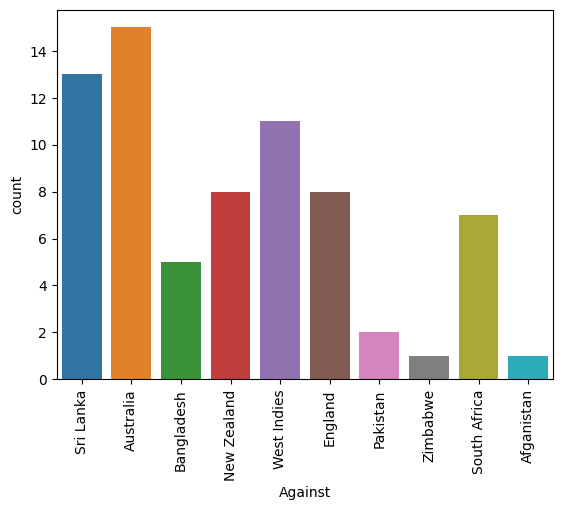

In [11]:
sns.countplot(data=df,x="Against")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Sri Lanka'),
  Text(1, 0, 'Australia'),
  Text(2, 0, 'Bangladesh'),
  Text(3, 0, 'New Zealand'),
  Text(4, 0, 'West Indies'),
  Text(5, 0, 'England'),
  Text(6, 0, 'Pakistan'),
  Text(7, 0, 'Zimbabwe'),
  Text(8, 0, 'South Africa'),
  Text(9, 0, 'Afganistan')])

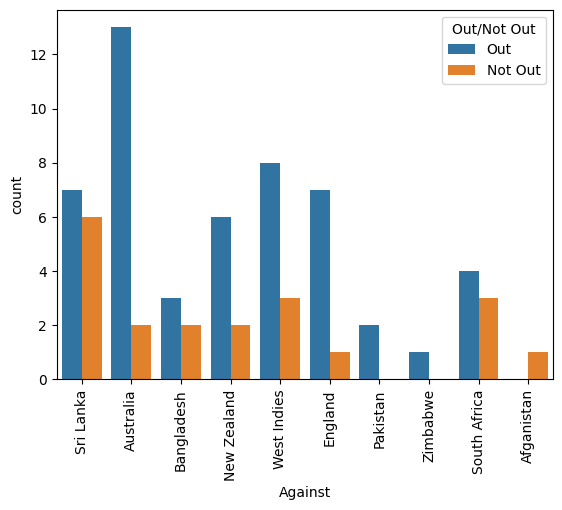

In [12]:
sns.countplot(data=df,x="Against",hue="Out/Not Out")
plt.xticks(rotation=90)

In [13]:
most_centuries=df.groupby('Against',as_index=False)['Score'].count().sort_values(by='Score',ascending=False).reset_index(drop=True)
most_centuries

,Against,Score
0,Australia,15
1,Sri Lanka,13
2,West Indies,11
3,England,8
4,New Zealand,8
5,South Africa,7
6,Bangladesh,5
7,Pakistan,2
8,Afganistan,1
9,Zimbabwe,1


from matplotlib import pyplot as plt
most_centuries['Score'].plot(kind='hist', bins=20, title='Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
most_centuries['Score'].plot(kind='line', figsize=(8, 4), title='Score')
plt.gca().spines[['top', 'right']].set_visible(False)

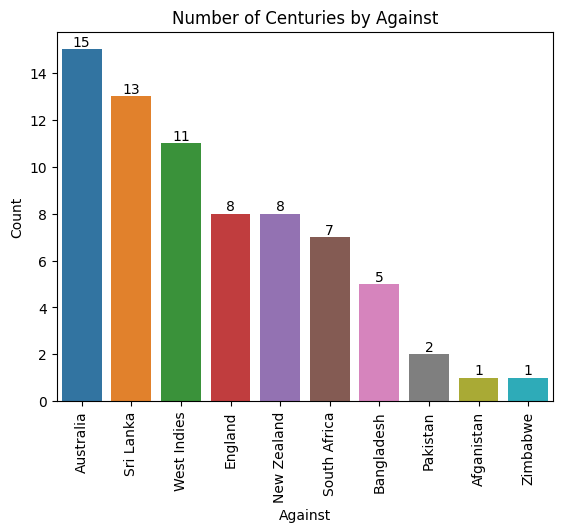

In [14]:
sns.barplot(data=most_centuries,x="Against",y="Score")
plt.xticks(rotation=90)
for i in range(len(most_centuries)):
    count = most_centuries.loc[i, 'Score']
    plt.text(i, count, str(count), ha='center', va='bottom')
    plt.xlabel('Against')
plt.ylabel('Count')
plt.title('Number of Centuries by Against')
plt.show()


In [15]:
table = df.pivot_table(index='Captain', columns='Out/Not Out', aggfunc='size', fill_value=0)
print(table)

Out/Not Out  Not Out  Out
Captain                  
No                10   20
Yes               10   31


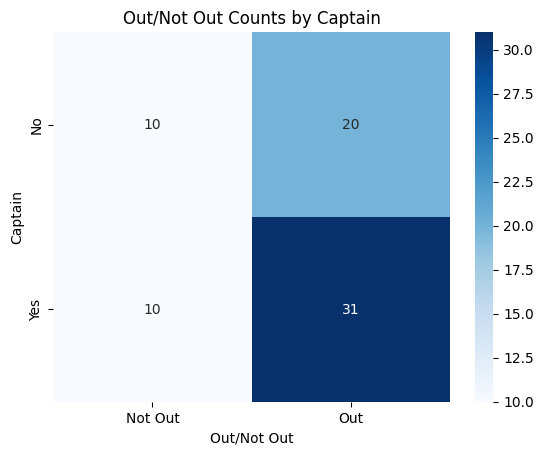

In [16]:
sns.heatmap(data=table, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Out/Not Out')
plt.ylabel('Captain')
plt.title('Out/Not Out Counts by Captain')
plt.show()

In [17]:
filtered_df = df[df['Result'].isin(["Won", "Lost"])]

# Create the pivot table
new_table = filtered_df.pivot_table(index='Result', columns='Captain', aggfunc='size', fill_value=0)

print(new_table)

Captain  No  Yes
Result          
Lost      4    9
Won      21   27


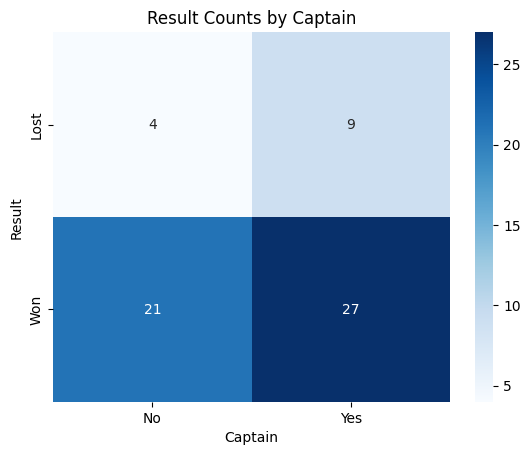

In [18]:
sns.heatmap(data=new_table, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Captain')
plt.ylabel('Result')
plt.title('Result Counts by Captain')
plt.show()

<Axes: xlabel='Format', ylabel='count'>

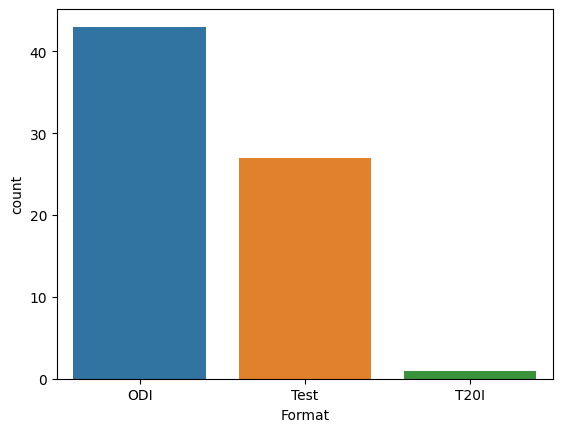

In [19]:
sns.countplot(data=df,x="Format")


<Axes: xlabel='Man of the Match', ylabel='count'>

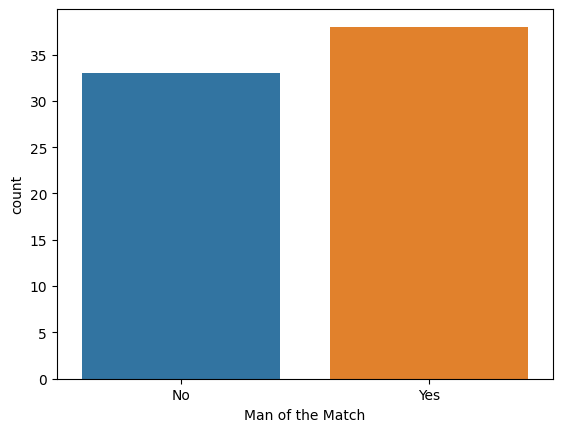

In [23]:
sns.countplot(data=df,x="Man of the Match")

In [25]:
year=df.groupby('Year',as_index=False)['Score'].count().sort_values(by='Year',ascending=True).reset_index(drop=True)
year

,Year,Score
0,2009,1
1,2010,3
2,2011,4
3,2012,8
4,2013,6
5,2014,8
6,2015,4
7,2016,7
8,2017,11
9,2018,11


from matplotlib import pyplot as plt
year['Year'].plot(kind='hist', bins=20, title='Year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
year['Score'].plot(kind='hist', bins=20, title='Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
year.plot(kind='scatter', x='Year', y='Score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Score']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = year.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Score')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Year']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Year'}, axis=1)
              .sort_values('Year', ascending=True))
  xs = counted['Year']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = year.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
year['Year'].plot(kind='line', figsize=(8, 4), title='Year')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
year['Score'].plot(kind='line', figsize=(8, 4), title='Score')
plt.gca().spines[['top', 'right']].set_visible(False)

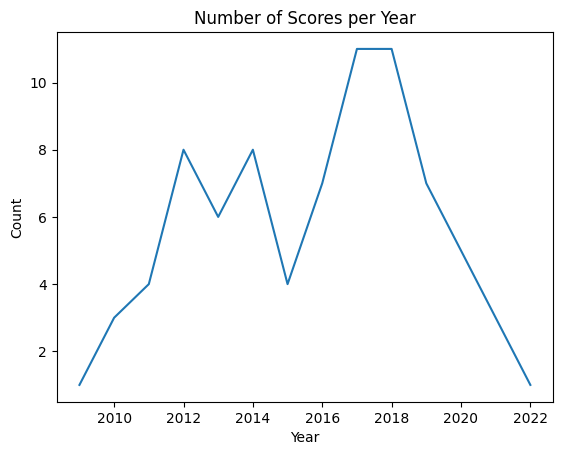

In [26]:
plt.plot(year['Year'], year['Score'])
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Number of Scores per Year')
plt.show()